In [78]:
import pandas as pd
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
%matplotlib inline

In [79]:
import graphviz
from xgboost import plot_tree

In [80]:
# Start by importing the data
bank = pd.read_csv('bank-full2.csv', delimiter=',')

In [81]:
# We drop the 288 rows where the job is unknown
bank = bank.drop(bank[bank.job=='unknown'].index)

In [82]:
# We will now create a new feature called date, we do this by combining the date, month and year columns, the format I will use is DDMMYYYY
bank['month'+"_code"] = lb_make.fit_transform(bank['month'])
bank['date'] = (bank['day']*1000000)+(bank['month_code']*10000)+bank['year']

In [83]:
# We'll clean up the data a bit by encoding the categories using a label encoder
lb_make = LabelEncoder()

categories = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']
for col in categories: 
    bank[str(col)+"_code"] = lb_make.fit_transform(bank[col])    
    
X = bank.drop(['y_code', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y', 'month', 'day', 'year'],axis=1)
y = bank['y_code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

bank_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

In [84]:
# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"rank:pairwise", "max_depth":5, "eta":0.078, "subsample":0.91, "colsample_bytree":0.95}
    
# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=bank_dmatrix, params=params, nfold=15, num_boost_round=420, as_pandas=True, early_stopping_rounds=50, metrics='auc')
print(cv_results)

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.919200      0.009211        0.926698       0.002599
1         0.922983      0.009210        0.929329       0.001802
2         0.925338      0.008987        0.931524       0.001801
3         0.926647      0.009058        0.932544       0.001599
4         0.927660      0.008385        0.933279       0.001786
5         0.928268      0.008150        0.933662       0.001817
6         0.928543      0.008046        0.933896       0.001670
7         0.929527      0.007683        0.934607       0.001746
8         0.930379      0.007269        0.935563       0.001552
9         0.930520      0.007154        0.935696       0.001541
10        0.930946      0.007034        0.936274       0.001543
11        0.931307      0.007465        0.936748       0.001523
12        0.931611      0.007534        0.937026       0.001310
13        0.931850      0.007357        0.937218       0.001306
14        0.932283      0.007251        

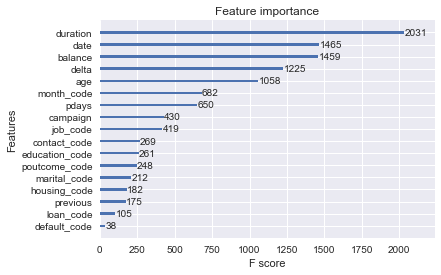

In [85]:
model = xgb.train(params=params, dtrain=bank_dmatrix, num_boost_round=400)
xgb.plot_importance(model)
plt.show()

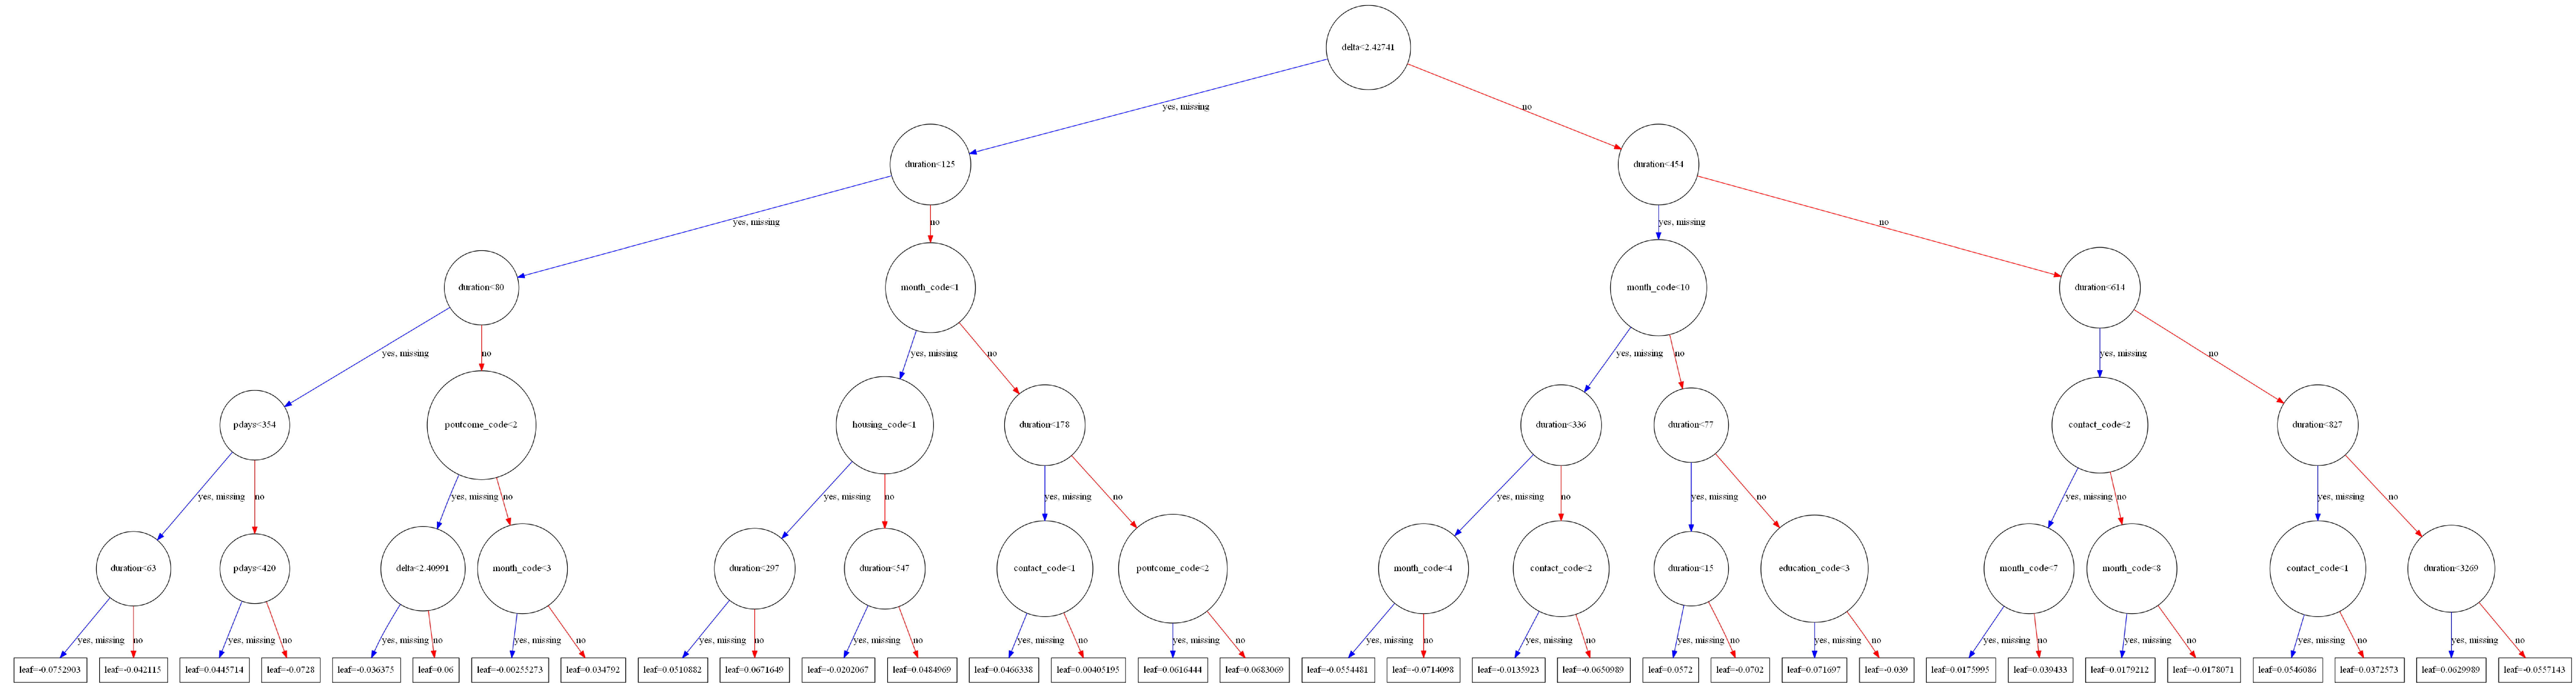

In [86]:
xgb.plot_tree(model, num_trees=0)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')